# Initialisation Project

Package import, dataset import, joining datasets
Database information

In [1]:
import keras 
print(keras.__path__)

['c:\\Users\\johnd\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\keras']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
real = pd.read_csv("../Dataset/True.csv")
fake = pd.read_csv("../Dataset/Fake.csv")

In [4]:
#Displayed the first 5 rows of the real news dataset
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
#Displayed the first 5 rows of the fake news dataset
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
#Shape of real news dataset
# print("Real news: ",real.shape)
#Shape of fake news dataset
# print("Fake News: ", fake.shape)

In [6]:
#Assigning a value of 0 for all real news data and placing it in the dataframe
class0 = []

for i in range(21417):
  class0.append(0)

real.insert(4, "class", class0, True)

In [7]:
#Assigning a value of 1 for all fake news data and placing it in the dataframe
class1 = []

for i in range(23481):
  class1.append(1)

fake.insert(4, "class", class1, True)

In [8]:
#Concactenating fake news and real news into 1 total dataset
total = pd.concat([real,fake])
total = total.sample(frac = 1)

In [9]:
#Shape of total
total.shape

(44898, 5)

In [10]:
#total = total.sample(frac=1)
#pd.set_option('display.width', total.shape[0])
total.head()


,title,text,subject,date,class
9673,ONE BRUTAL IMAGE Perfectly Captures The Truth ...,A spokesperson for the Clinton Foundation clai...,politics,"Oct 16, 2017",1
20775,GAP APOLOGIZES For “Offensive Image” After Bla...,This social media campaign against the GAP is ...,left-news,"Apr 6, 2016",1
5275,Watch Bill Clinton Unleash His Inner Child Wi...,Bill Clinton just watched his wife accept the ...,News,"July 29, 2016",1
12430,Pakistani court summons police in case of miss...,"LAHORE, Pakistan (Reuters) - A Pakistani court...",worldnews,"December 13, 2017",0
6367,Protests will aim to disrupt Trump inauguratio...,WASHINGTON (Reuters) - Thousands of demonstrat...,politicsNews,"January 12, 2017",0


In [11]:
#Extract only the values for title (input) and class (output)
data = total[['title','text','class']]
data.head()


,title,text,class
9673,ONE BRUTAL IMAGE Perfectly Captures The Truth ...,A spokesperson for the Clinton Foundation clai...,1
20775,GAP APOLOGIZES For “Offensive Image” After Bla...,This social media campaign against the GAP is ...,1
5275,Watch Bill Clinton Unleash His Inner Child Wi...,Bill Clinton just watched his wife accept the ...,1
12430,Pakistani court summons police in case of miss...,"LAHORE, Pakistan (Reuters) - A Pakistani court...",0
6367,Protests will aim to disrupt Trump inauguratio...,WASHINGTON (Reuters) - Thousands of demonstrat...,0


In [12]:
del class0, class1,fake,real,total,i

In [13]:
# Character Length of Titles - Min, Mean, Max
print('Mean Length', data['title'].apply(len).mean())
print('Min Length', data['title'].apply(len).min())
print('Max Length', data['title'].apply(len).max())
print('Mean Length', data['text'].apply(len).mean())
print('Min Length', data['text'].apply(len).min())
print('Max Length', data['text'].apply(len).max())

Mean Length 80.11171989843646
Min Length 8
Max Length 286
Mean Length 2469.1096930820972
Min Length 1
Max Length 51794


In [14]:
num_rows = (data['text'].str.len() > 3900).sum()
print('Number of rows with more than 8000 characters:', num_rows)

#Removing rows with more than 8000 characters
data = data[data['text'].str.len() < 3900]



Number of rows with more than 8000 characters: 6801


In [ ]:
#plotting the frequency of characters on a histogram
import seaborn as sns

x = data['title'].apply(len).plot.hist()

In [ ]:
x = data['text'].apply(len).plot.hist()

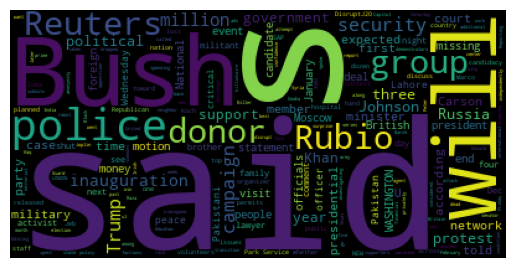

In [15]:
#Word cloud of most common words from real news
#For fake news, change ["class"] == 0 to 1
from wordcloud import WordCloud, STOPWORDS

#Note to self: fix for entire dataset
text = data[data["class"] == 0].values
wc = WordCloud(stopwords=STOPWORDS).generate(str(text))
plt.imshow(wc)
plt.axis("off")
plt.show()

del text,wc

In [16]:
#Extracting numpy arrays for the title and classes
titles = data["title"].values
texts = data["text"].values
labels = data["class"].values

#merging title and text
news = np.array(list(zip(titles,texts)))

del titles,texts

# Model Building

In [17]:
from sklearn.model_selection import train_test_split

#Split data into training and testing dataset
#We teach our model based on the training set (including the labels)
#We take the labels away to test our model with the testing set
news_train, news_test, y_train, y_test = train_test_split(news, labels, test_size=0.2)

del news,labels

In [ ]:
%pip install tensorflow-text


## BERT Implementation

In [ ]:
import tensorflow_hub as hub
#import tensorflow_text as text
#Download bert preprocesser and bert encoder from tensorflow_hub
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [ ]:
def embed(headlines):
  processed = bert_preprocess(headlines)
  return bert_encoder(processed)['pooled_output']

In [ ]:
import tensorflow as tf

# Input Layers
input_layer = tf.keras.layers.Input(shape=(), dtype=tf.string, name='news')

# BERT layers
processed = bert_preprocess(input_layer)
output = bert_encoder(processed)

# Neural Network Layers

layer = tf.keras.layers.Dropout(0.2, name='dropout')(output['pooled_output'])
layer = tf.keras.layers.Dense(10,activation='relu', name='hidden')(layer)
layer = tf.keras.layers.Dense(1,activation='sigmoid', name='output')(layer)


model = tf.keras.Model(inputs=[input_layer],outputs=[layer])


## BERT Architecture

In [ ]:
model.summary()

## Training and evaluation output

In [ ]:
#Compile model on adam optimizer, binary_crossentropy loss, and accuracy metrics
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#Train model on 5 epochs
model.fit(news_train,y_train,epochs=5)

In [ ]:
#Evaluate model on test data
model.evaluate(news_test,y_test)

In [ ]:
#!pip install transformers --upgrade

In [ ]:
#model.save('bert_91_1.h5')

from transformers import TFBertPreprocessor

preprocessor = TFBertPreprocessor.from_pretrained('bert-base-uncased')

sample_text = "U.S. officials working to restore public trust in police: attorney general"
encoded_text = preprocessor(sample_text, return_tensors='tf')

model = tf.keras.models.load_model('bert_91_1.h5')  # Replace with your model filename

prediction = model.predict(encoded_text)


# Pictorial Result

In [ ]:
# Pictorial Output

# Evaluate the model and make predictions on test data
y_pred = model.predict(news_test)

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred.round())
print("Confusion Matrix:")
print(cm)


import matplotlib.pyplot as plt
import seaborn as sns


# Create a heatmap with labels
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")  # Adjust cmap for color scheme

# Set labels for axes
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Set labels for each cell (optional)
class_labels = ["Real News", "Fake News"]  # Adjust class labels based on your data
plt.xticks(ticks=range(len(class_labels)), labels=class_labels)
plt.yticks(ticks=range(len(class_labels)), labels=class_labels)

plt.title("Confusion Matrix - Fake News Detection")
plt.show()


In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fake News Detection')
plt.legend(loc="lower right")
plt.show()

# Sample Input

## TFBertPreprocessor

installation issue. Package not found.

In [ ]:
from transformers import TFBertPreprocessor
import tensorflow as tf

# Load the preprocessor
preprocessor = TFBertPreprocessor.from_pretrained('bert-base-uncased')

# Define a function to handle sample input prediction
def predict_sample(sample_text):
  """
  This function takes a sample news title as input, preprocesses it using the BERT preprocessor,
  loads the saved model, makes a prediction, and returns the predicted class and probability.
  """
  encoded_text = preprocessor(sample_text, return_tensors='tf')

  # Load the saved model
  model = tf.keras.models.load_model('bert_91_1.h5')

  # Make prediction
  prediction = model.predict(encoded_text)
  predicted_class = tf.argmax(prediction, axis=1).numpy()[0]  # Get class index
  predicted_proba = prediction.numpy()[0][predicted_class]  # Get probability for predicted class

  # Interpret and return prediction results
  class_labels = ["Real News", "Fake News"]  # Adjust based on your data
  predicted_label = class_labels[predicted_class]

  return predicted_label, predicted_proba

# Example usage: Provide a sample news title
sample_text = "U.S. officials working to restore public trust in police: attorney general"

# Get prediction
predicted_label, predicted_proba = predict_sample(sample_text)

print(f"Predicted Label: {predicted_label}")
print(f"Predicted Probability: {predicted_proba:.4f}")
